<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

disini kita akan mencoba memprediksi penumpang yang selamat dan yang tidak menggunakan beberapa algoritma machine learning. untuk data yang lebih dan end point yang dituju bisa langsung kunjungi link kaggle berikut; www.kaggle.com/competitions/titanic/overview/description

# Bagian pertama
 <n/>melihat grafik pada sebaran data yang mungkin mengandung informasi

In [3]:
# import semua library yang di perlukan
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# import file ke notebook
import pandas as pd

# Load CSV file
df = pd.read_csv('train.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


explorasi data pada dataset

In [4]:
train = pd.read_csv("train.csv")

display(train.head())

print(train.info())
print(train.info())
print(train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

Mari kita mulai dengan kolom Selamat. Kolom ini berisi bilangan bulat 1 atau 0 yang berhubungan dengan selamat (1 = Selamat, 0 = Tidak Selamat)

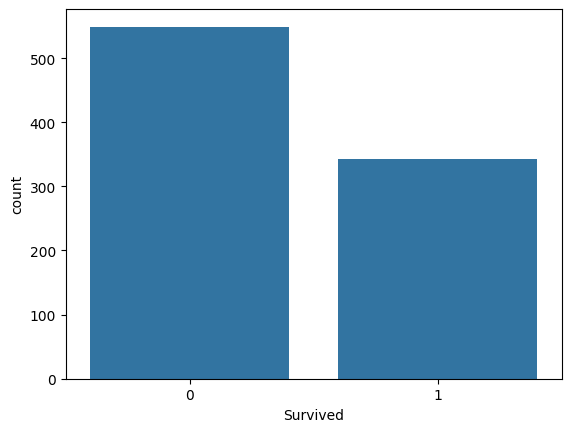

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [5]:
# visulisasi menggunkan countplot
sns.countplot(x="Survived", data=train)
plt.show()

# Print preposisinya
print(train["Survived"].value_counts(normalize=True))

# *Pclass*
Kolom Pclass berisi status sosial ekonomi penumpang. Hal ini dapat menjadi prediktif untuk model kita

<n/>
1 = Atas

<n/>

2 = Menengah
<n/>

3 = Bawah

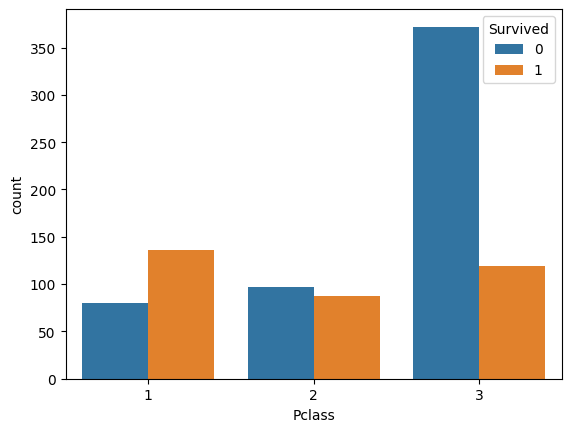

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [6]:
# visualisasi menggunakan countplot
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

# proporsi orang yang selamat di setiap kelas
print(train["Survived"].groupby(train["Pclass"]).mean())

# seberapa banyak orang yang ada di setiap kelas?
print(train["Pclass"].value_counts())

Seperti yang telah diduga, penumpang kelas satu memiliki tingkat kelangsungan hidup yang lebih tinggi. kita akan menggunakan informasi ini dalam data pelatihan kita.

In [7]:
# melihat 5 baris ppertana dari colom!
display(train[["Name"]].head())

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Kita dapat mengekstrak title dari nama. mungkin kita bisa mendapatkan informasi yang menarik

In [8]:
# mengambil title
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# mejumlahkan menurut title
print(train["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


Apakah ada hubungan antara title(gelar) dan bertahan hidup?.

menarik untuk di ketahui apakah ada benang merah atar keduanya!





In [9]:
# Print presentase bertahan hidup berdasarkan title
print(train["Survived"].groupby(train["Title"]).mean().sort_values(ascending=False))

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


Ternyata, ada korelasi antara gelar dan tingkat kelangsungan hidup. Di bagian teknik fitur, saya akan mengelompokkan gelar berdasarkan tingkat kelangsungan hidupnya seperti berikut ini


lebih tinggi = bangsawan, nyonya, nona, ibu, tuan, nyonya muda, nyonya tua, tuan

netral = Mayor, Kolonel, Dr

lebih rendah = Tuan, Pendeta, Jonkheer, Don, Kapten

#usia

In [10]:
print(train["Age"].isnull().sum())

177


Ada 177 nilai yang hilang di kolom Usia, kita akan memperhitungkannya di bagian rekayasa fitur. Sekarang, mari kita lihat distribusi usia dengan pengaruh bertahan hidup

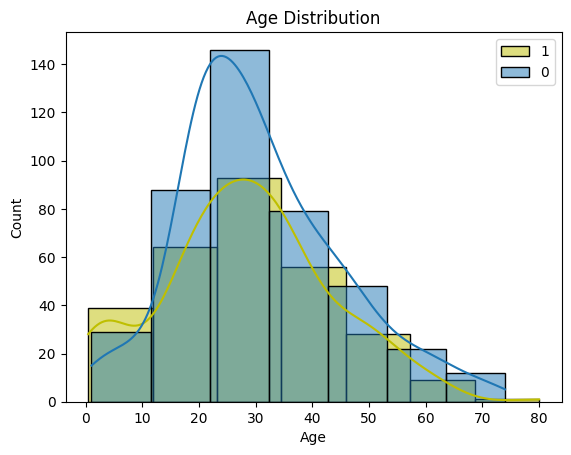

In [12]:
# Bertahan hidup berdasarkan usia
sns.histplot(train[train.Survived == 1]["Age"], color="y", bins=7, label="1", kde=True)

# kematian berdasarkan usia
sns.histplot(train[train.Survived == 0]["Age"], bins=7, label="0", kde=True)

# legend
plt.legend()
plt.title("Age Distribution")
plt.show()

# jenis kelamin

apakah jenis kelamin mempengaruhi rasio bertahan hidup?

apakah laki-laki memiliki tingkat selamat yang lebih tinggi dari perempuan atau sebaliknya!?

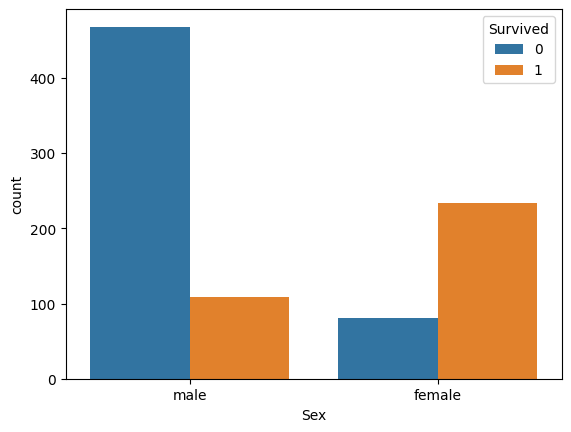

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64


In [13]:
# vusialisasi countplot
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

# jumlah orang-orang yang selamat di setiap kelas
print(train["Survived"].groupby(train["Sex"]).mean())

# seberapa banyak orang yang kita punya?
print(train["Sex"].value_counts())

Jelas, ada hubungan antara jenis kelamin dan bertahan hidup. dan sungguh menarik mengetahui bahwa wanita memiliki rasio bertahan hidup lebih tinggi. kira-kita kenapa bisa demikian?

# SibSp(saudara) & Parch(orang tua)




SibSp = Nomor Saudara Kandung atau Pasangan

Parch = Nomor Orang Tua atau Anak

Kemudian saya memutuskan untuk membuat fitur baru yang disebut ukuran keluarga dengan menjumlahkan kolom SibSp dan Parch

In [14]:
print(train["SibSp"].value_counts())

print(train["Parch"].value_counts())

train["family_size"] = train["SibSp"] + train["Parch"]

print(train["family_size"].value_counts())

# Proportion of people survived for each class
print(train["Survived"].groupby(train["family_size"]).mean().sort_values(ascending=False))

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64
family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Tampaknya, ukuran keluarga penting untuk bertahan hidup. Saya akan mengelompokkan mereka dalam langkah rekayasa fitur seperti berikut
keluarga besar = jika ukuran keluarga > 3

keluarga kecil = jika ukuran keluarga > 0 dan ukuran keluarga < =3

sendirian = ukuran keluarga == 0